For mike: conda activate vijay_singlecell

In [1]:
library("plotgardener")
library("org.Hs.eg.db")
library("TxDb.Hsapiens.UCSC.hg19.knownGene")
library("rtracklayer")
library("iterators")
library(ArchR)


Attaching package: ‘plotgardener’


The following object is masked from ‘package:base’:

    c


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packag

ERROR: Error in library("TxDb.Hsapiens.UCSC.hg19.knownGene"): there is no package called ‘TxDb.Hsapiens.UCSC.hg19.knownGene’


In [ ]:
#load in GWAS data
SNP_Kupari_full = rtracklayer::import('/home/vijaykic/BaDoi/data/raw_data/BED/Kupari_gwas_all_scored.bed')
#SNP_Kupari_full$chr = seqnames(SNP_Kupari_full)@values

In [ ]:
SNP_Kupari_full$chrom = as.character(seqnames(SNP_Kupari_full))
SNP_Kupari_full$pos = ranges(SNP_Kupari_full)@start
SNP_Kupari_full$p = SNP_Kupari_full$score
SNP_Kupari_full$snp = SNP_Kupari_full$name

In [ ]:
#load the files - OCR PEAKS
extraCols_narrowPeak <- c(signalValue = "numeric", pValue = "numeric",
                          qValue = "numeric", peak = "integer")
HALPERDIR = '/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks'
HALPERPEAKS = list.files(HALPERDIR)
HALPERPEAKS
length(HALPERPEAKS)

In [14]:
#create iterator to build file paths easier
file_iter = iter(HALPERPEAKS)

#file paths
Astro1 = file.path(HALPERDIR, nextElem(file_iter))  %>% print
Astro2 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
Endo = file.path(HALPERDIR, nextElem(file_iter)) %>% print
Epend = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GABA1 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GABA2_1 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GABA2_2 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GABA3 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GABA4_1 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GABA4_2 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GABA5 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT1 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT10 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT11 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT2 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT3 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT4 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT5 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT6 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT7 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT8 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT9 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
Mening = file.path(HALPERDIR, nextElem(file_iter)) %>% print
Microgl = file.path(HALPERDIR, nextElem(file_iter)) %>% print
midVen = file.path(HALPERDIR, nextElem(file_iter)) %>% print
Mural = file.path(HALPERDIR, nextElem(file_iter)) %>% print
Oligo1 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
Oligo2 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
OPC = file.path(HALPERDIR, nextElem(file_iter)) %>% print

peakFile_vec = c(Astro1, Astro2, Endo, Epend, GABA1, GABA2_1, GABA2_2, GABA3, GABA4_1, GABA4_2, GABA5, GLUT1, GLUT10, GLUT11,
                GLUT2, GLUT3, GLUT4, GLUT5, GLUT6, GLUT7, GLUT8, GLUT9, Mening, Microgl, midVen, Mural, Oligo1, Oligo2, OPC)

[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_Astrocyte.1_Mouse_toHuman.narrowPeak"
[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_Astrocyte.2_Mouse_toHuman.narrowPeak"
[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_Endothelial_Mouse_toHuman.narrowPeak"
[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_Ependymal.cells_Mouse_toHuman.narrowPeak"
[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_GABA1_Mouse_toHuman.narrowPeak"
[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_GABA2_1_Mouse_toHuman.narrowPeak"
[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_GABA2_2_Mouse_toHuman.narrowPeak"
[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_GABA3_Mouse_toHuman.narrowPeak"
[1] "/ho

In [15]:
#making a list of cellspecific peak GRanges objects
gr = list()
file_iter = iter(HALPERPEAKS)
for (peaks in peakFile_vec){
    x = rtracklayer::import(peaks, format = "BED", extraCols = extraCols_narrowPeak)
    #start(x) = floor(start(x)/(3*10^3) - 1)*(3*10^3)+1
    #end(x) = ceiling(end(x)/(3*10^3) + 1)*(3*10^3)
    name = gsub("cellspecific_|_Mouse_toHuman.narrowPeak",  
                "", 
                nextElem(file_iter))
    gr[name] = x[order(as.numeric(x$score), decreasing = TRUE)]   

    #gr[ss(nextElem(file_iter), "_")] = x[order(as.numeric(x$score), decreasing = TRUE)]   
}
gr

Warning message in `[<-`(`*tmp*`, name, value = x[order(as.numeric(x$score), decreasing = TRUE)]):
"implicit list embedding of S4 objects is deprecated"
Warning message in `[<-`(`*tmp*`, name, value = x[order(as.numeric(x$score), decreasing = TRUE)]):
"implicit list embedding of S4 objects is deprecated"
Warning message in `[<-`(`*tmp*`, name, value = x[order(as.numeric(x$score), decreasing = TRUE)]):
"implicit list embedding of S4 objects is deprecated"
Warning message in `[<-`(`*tmp*`, name, value = x[order(as.numeric(x$score), decreasing = TRUE)]):
"implicit list embedding of S4 objects is deprecated"
Warning message in `[<-`(`*tmp*`, name, value = x[order(as.numeric(x$score), decreasing = TRUE)]):
"implicit list embedding of S4 objects is deprecated"
Warning message in `[<-`(`*tmp*`, name, value = x[order(as.numeric(x$score), decreasing = TRUE)]):
"implicit list embedding of S4 objects is deprecated"
Warning message in `[<-`(`*tmp*`, name, value = x[order(as.numeric(x$score), decre

$Astrocyte.1
GRanges object with 2306 ranges and 6 metadata columns:
         seqnames              ranges strand |                   name     score
            <Rle>           <IRanges>  <Rle> |            <character> <numeric>
     [1]     chr1     1869407-1869856      * | mm10:chr4:155504952-..        -1
     [2]     chr1     1914483-1914800      * | mm10:chr4:155473358-..        -1
     [3]     chr1     2352326-2353037      * | mm10:chr4:155116298-..        -1
     [4]     chr1     2835497-2836099      * | mm10:chr4:154810041-..        -1
     [5]     chr1     2936780-2937331      * | mm10:chr4:154738701-..        -1
     ...      ...                 ...    ... .                    ...       ...
  [2302]     chrX 153504044-153504540      * | mm10:chrX:73490126-7..        -1
  [2303]     chrX 154032832-154033318      * | mm10:chrX:74037605-7..        -1
  [2304]     chrX 154403004-154403504      * | mm10:chrX:74273839-7..        -1
  [2305]     chrX 154464132-154464639      * | mm10

In [16]:
GABA4_2 = gr['GABA4_2']
GABA4_2 = unlist(as(GABA4_2, "GRangesList"))
GABA4_2

GRanges object with 3251 ranges and 6 metadata columns:
          seqnames              ranges strand |                   name
             <Rle>           <IRanges>  <Rle> |            <character>
  GABA4_2     chr1     6151074-6151785      * | mm10:chr4:152359269-..
  GABA4_2     chr1     7077312-7077772      * | mm10:chr4:151601255-..
  GABA4_2     chr1     7191380-7191877      * | mm10:chr4:151497589-..
  GABA4_2     chr1     7580228-7580619      * | mm10:chr4:151214473-..
  GABA4_2     chr1     7661034-7661462      * | mm10:chr4:151148910-..
      ...      ...                 ...    ... .                    ...
  GABA4_2     chrX 145167837-145168337      * | mm10:chrX:65690347-6..
  GABA4_2     chrX 146181003-146181503      * | mm10:chrX:66941886-6..
  GABA4_2     chrX 146450940-146451453      * | mm10:chrX:67282727-6..
  GABA4_2     chrX 148286611-148287103      * | mm10:chrX:69148482-6..
  GABA4_2     chrX 148436080-148436597      * | mm10:chrX:69300198-6..
              score s

In [18]:
GABA4_2$mouse_name <- NULL
GABA4_2$name <- NULL
GABA4_2$score <- GABA4_2$peak
GABA4_2$peak <- NULL
GABA4_2$signalValue <- NULL
GABA4_2$pValue <- NULL
GABA4_2$qValue <- NULL
GABA4_2 = GABA4_2[seqnames(GABA4_2) %in% "chr13"]
GABA4_2

GRanges object with 116 ranges and 1 metadata column:
          seqnames              ranges strand |     score
             <Rle>           <IRanges>  <Rle> | <integer>
  GABA4_2    chr13   21824373-21824963      * |       350
  GABA4_2    chr13   23280073-23280564      * |       270
  GABA4_2    chr13   26024481-26024951      * |       249
  GABA4_2    chr13   26621627-26622200      * |       300
  GABA4_2    chr13   29225494-29226083      * |       266
      ...      ...                 ...    ... .       ...
  GABA4_2    chr13 105979915-105980337      * |       251
  GABA4_2    chr13 111107996-111108445      * |       165
  GABA4_2    chr13 111320884-111321435      * |       259
  GABA4_2    chr13 112527672-112528337      * |       246
  GABA4_2    chr13 112564809-112565373      * |       317
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

In [19]:
#combine the neuron enhancers into one GRange object
neurons = c('GABA1', 'GABA2_1','GABA2_2','GABA3','GABA4_1','GABA4_2','GABA5','GLUT10','GLUT11','GLUT1','GLUT2','GLUT3','GLUT4','GLUT5','GLUT6','GLUT7','GLUT8','GLUT9')
names(gr)

neurons_lst = gr[names(gr) %in% neurons]
neurons_gr = unlist(as(neurons_lst, "GRangesList"))

[1] "Astrocyte.1"     "Astrocyte.2"     "Endothelial"     "Ependymal.cells"
 [5] "GABA1"           "GABA2_1"         "GABA2_2"         "GABA3"          
 [9] "GABA4_1"         "GABA4_2"         "GABA5"           "GLUT10"         
[13] "GLUT11"          "GLUT1"           "GLUT2"           "GLUT3"          
[17] "GLUT4"           "GLUT5"           "GLUT6"           "GLUT7"          
[21] "GLUT8"           "GLUT9"           "Meninges"        "Microglia"      
[25] "Mural"           "OPC"             "Oligo.1"         "Oligo.2"        
[29] "midVen"

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr1_KI270759v1_alt
  - in 'y': chr17_KI270857v1_alt, chrY
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr1_KI270759v1_alt, chr17_KI270857v1_alt, chrY
  - in 'y': chr15_GL383555v2_alt
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr1_KI270759v1_alt, chrY, chr15_GL383555v2_alt
  - in 'y': chr11_KI270829v1_alt, chr6_GL383533v1_alt
  Make sure to always combine/compare objects based on the same reference
  genome 

In [20]:
neurons_lst

$GABA1
GRanges object with 4798 ranges and 6 metadata columns:
         seqnames              ranges strand |                   name     score
            <Rle>           <IRanges>  <Rle> |            <character> <numeric>
     [1]     chr1     1069247-1069829      * | mm10:chr4:156134874-..        -1
     [2]     chr1     1756930-1757466      * | mm10:chr4:155583976-..        -1
     [3]     chr1     2143527-2144230      * | mm10:chr4:155294377-..        -1
     [4]     chr1     3517112-3517710      * | mm10:chr4:154247430-..        -1
     [5]     chr1     3734203-3734872      * | mm10:chr4:154057499-..        -1
     ...      ...                 ...    ... .                    ...       ...
  [4794]     chrX 149453881-149454388      * | mm10:chrX:70314913-7..        -1
  [4795]     chrX 150470499-150471007      * | mm10:chrX:71118255-7..        -1
  [4796]     chrX 153489143-153489655      * | mm10:chrX:73477467-7..        -1
  [4797]     chrX 153537505-153537919      * | mm10:chrX:

In [21]:
table(names(neurons_gr))
neurons_gr$names = names(neurons_gr)


  GABA1 GABA2_1 GABA2_2   GABA3 GABA4_1 GABA4_2   GABA5   GLUT1  GLUT10  GLUT11 
   4798     113    5250    4438    3453    3251    4562    2718     640     108 
  GLUT2   GLUT3   GLUT4   GLUT5   GLUT6   GLUT7   GLUT8   GLUT9 
   5138    5331    4174    1439    4519    4784    1539      94 

In [22]:
#all neurons OTHER than GLUT3
neurons_gr = neurons_gr[neurons_gr$names %ni% 'GABA4_2']
table(names(neurons_gr))


  GABA1 GABA2_1 GABA2_2   GABA3 GABA4_1   GABA5   GLUT1  GLUT10  GLUT11   GLUT2 
   4798     113    5250    4438    3453    4562    2718     640     108    5138 
  GLUT3   GLUT4   GLUT5   GLUT6   GLUT7   GLUT8   GLUT9 
   5331    4174    1439    4519    4784    1539      94 

manhattan[manhattan1]

genomeLabel[genomeLabel1]

yaxis[yaxis1]

text[text1]

segments[segments1]

text[text2]

genes[genes1]

ranges[ranges1]

ranges[ranges2]

text[text2]

text[text2]

text[text2]

rect[rect1]

rect[rect2]

rect[rect2]

rect[rect2]

rect[rect2]



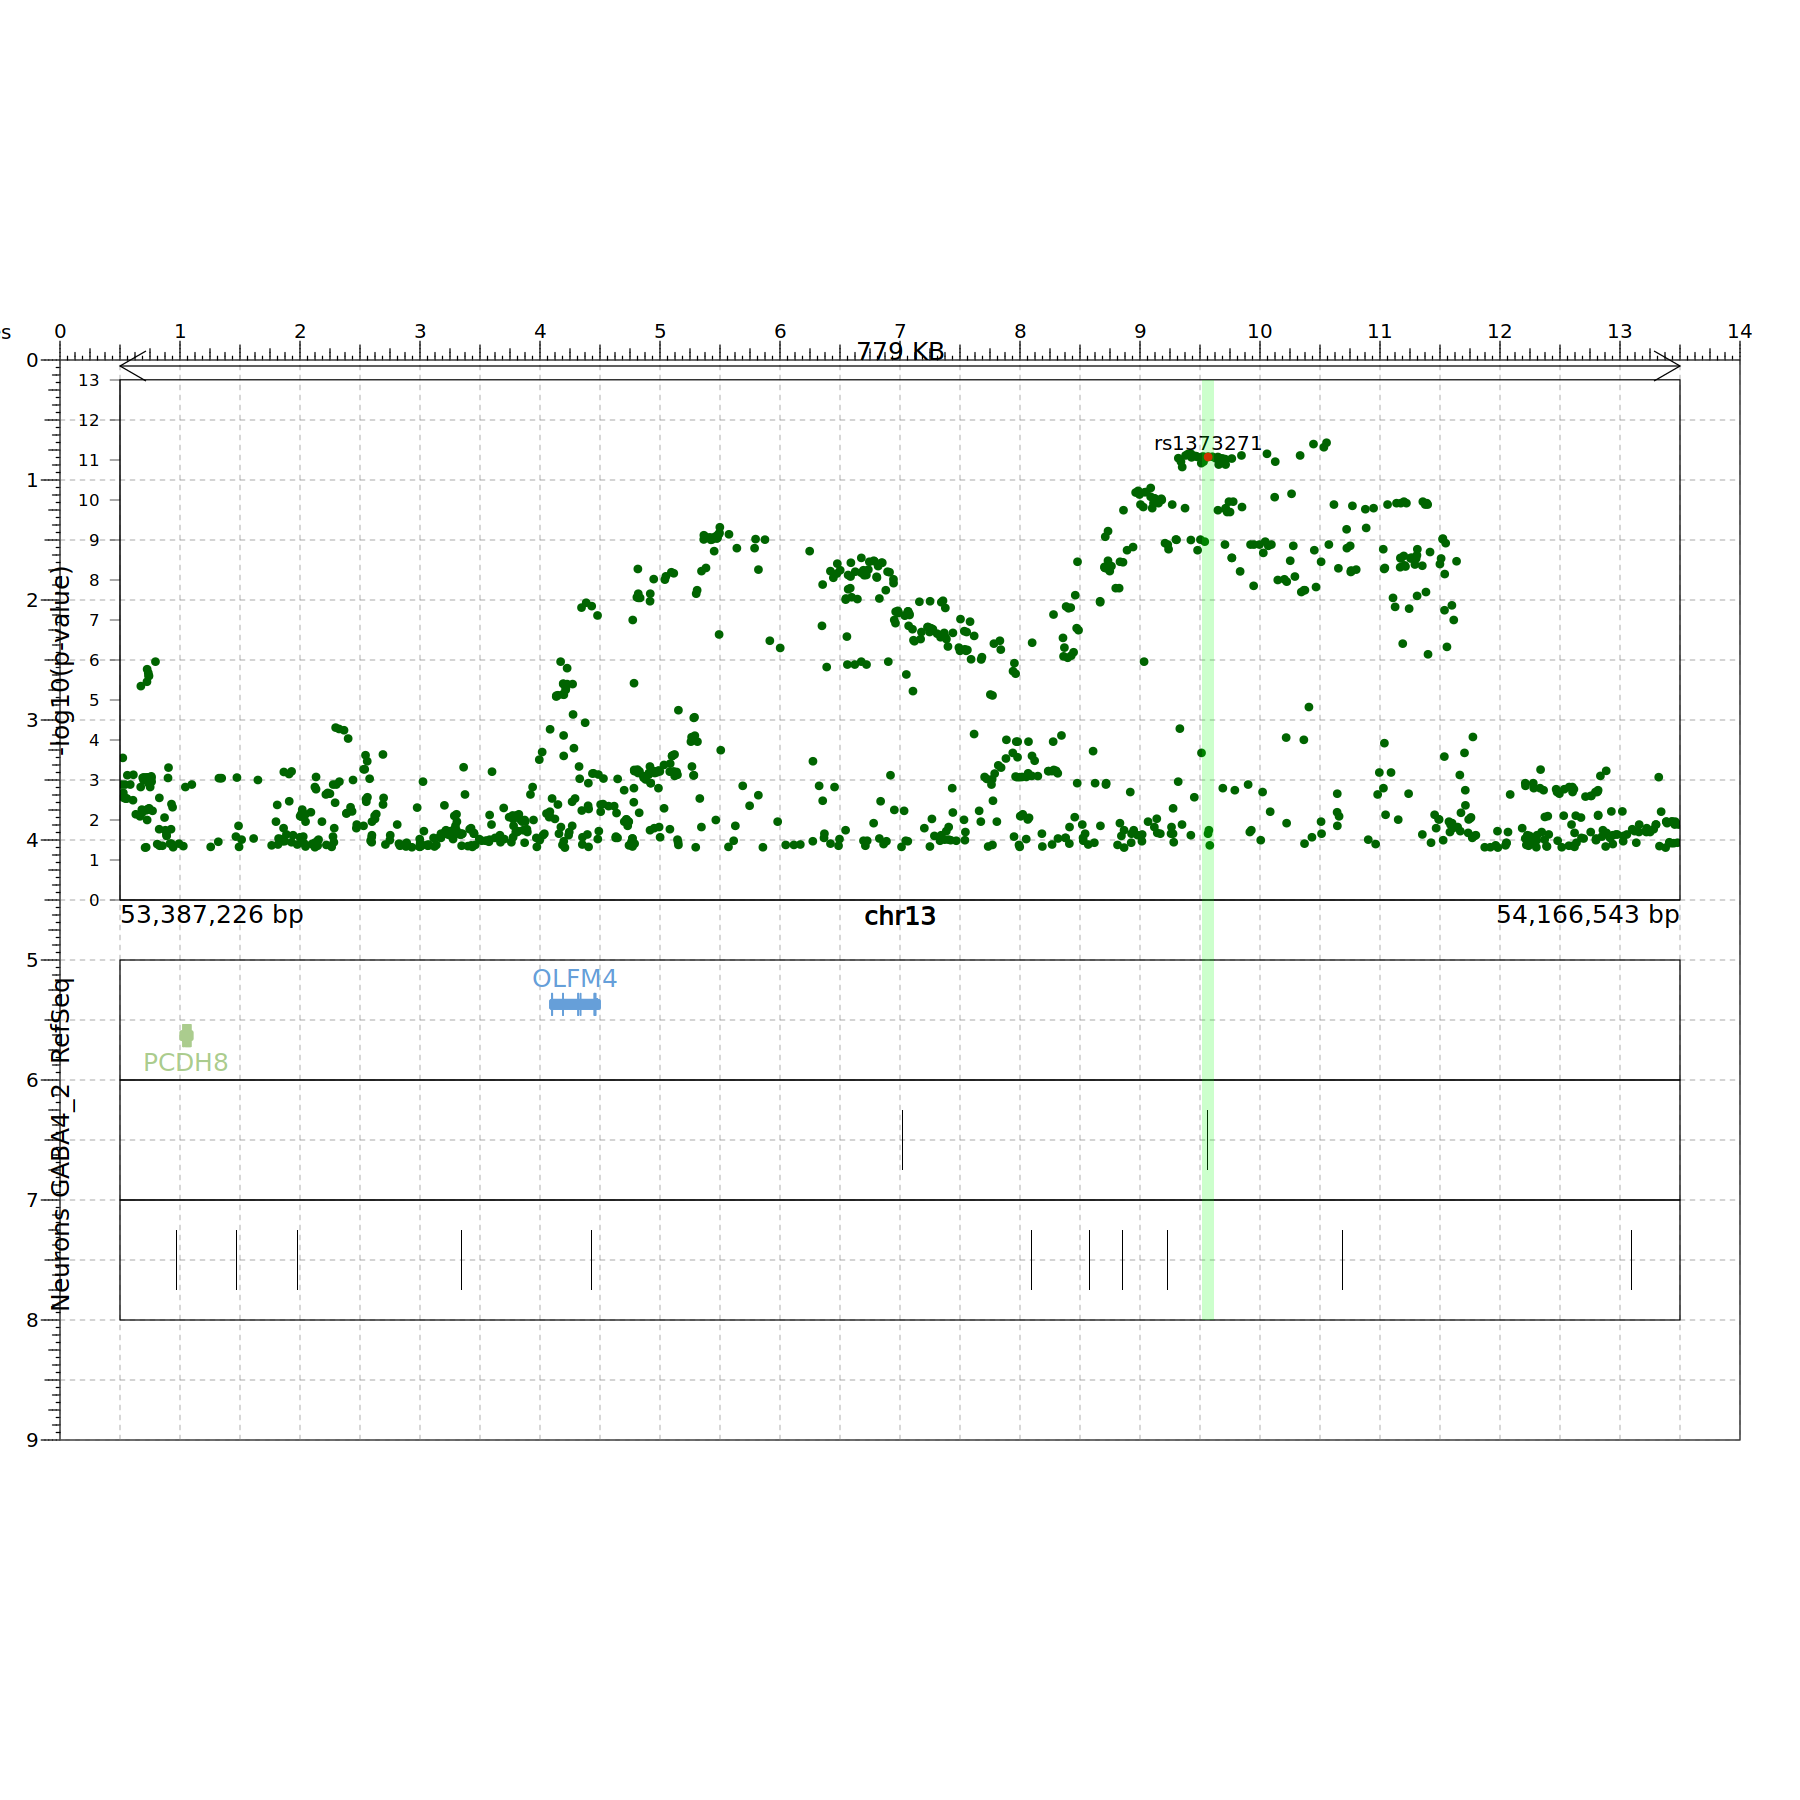

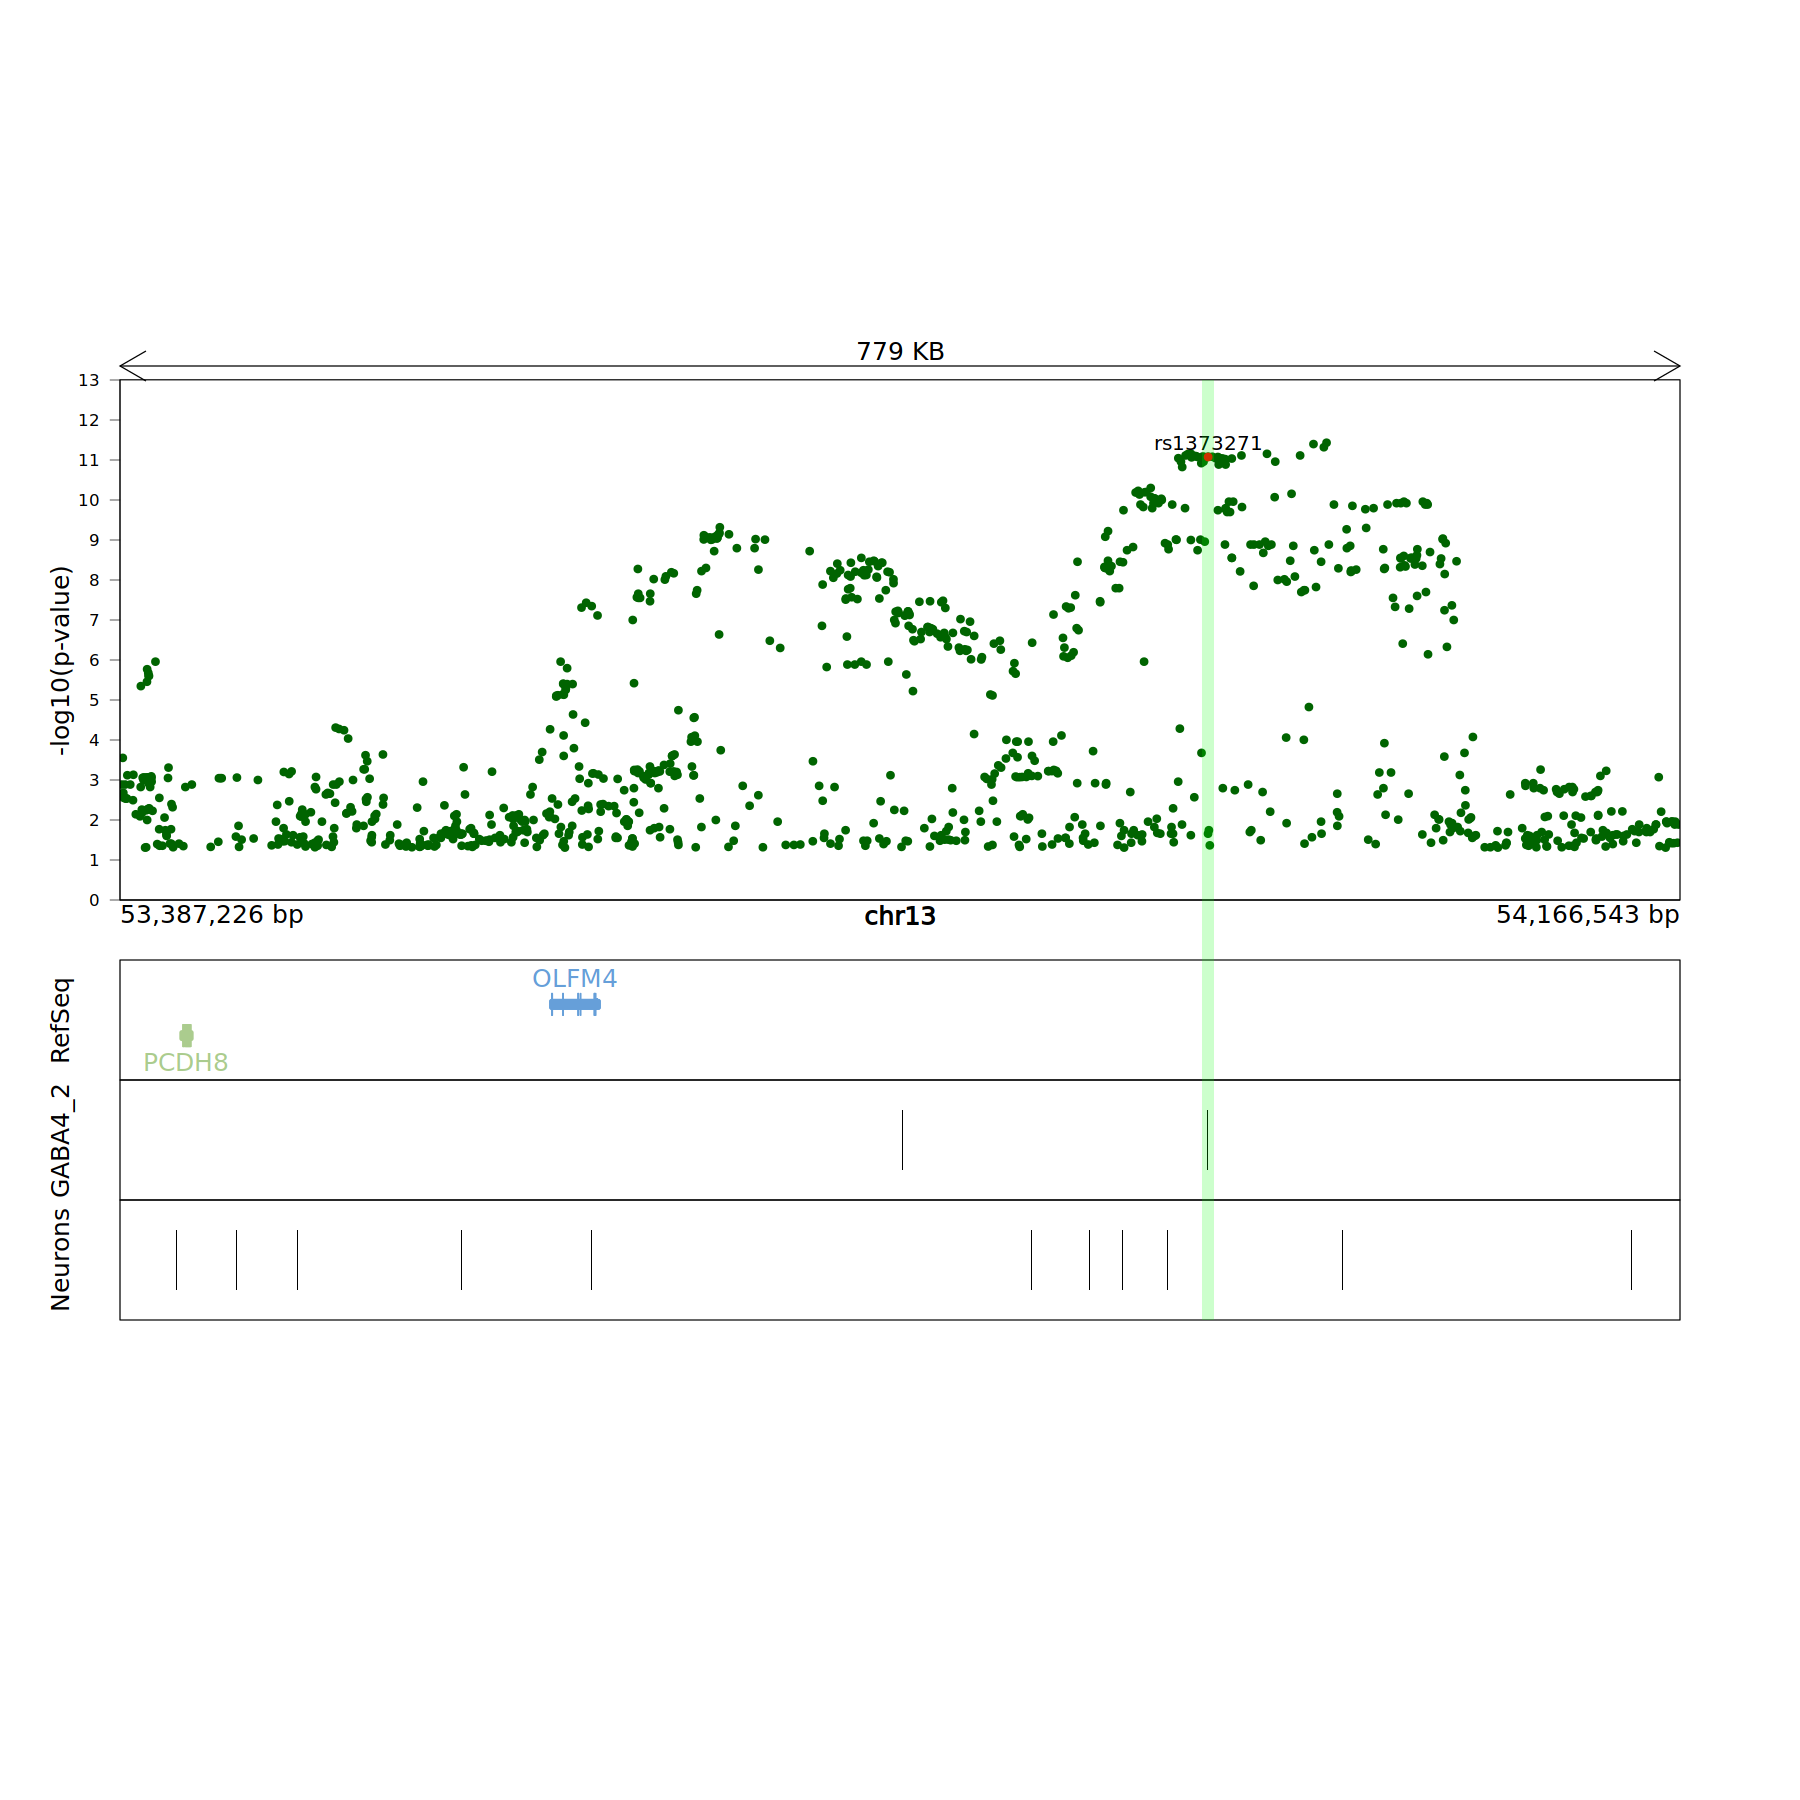

In [30]:
options(repr.plot.width=15, repr.plot.height=15)
## Create a plotgardener page
params <- pgParams(
    chrom = "chr13", chromstart = 53387226, chromend = 54166543,
    assembly = "hg19",
    x = 0.5, just = c("left", "top"),
    default.units = "inches", width = 13
)

pageCreate(
    width = 14, height = 9, default.units = "inches",
)

#manhattan plot on page
manPlot = plotManhattan(
    data = SNP_Kupari_full,
    params = params, y = 0.5, height = 4,
    cex = 0.4, fill = "dark green", leadSNP = list(snp = "rs1373271", fill = 'red'),
    fontsize = 15
)

annoGenomeLabel(
    plot = manPlot, x = 0.5, y = 4.5, fontsize = 15,
    just = c("left", "top"), default.units = "inches"
)

## Annotate y-axis
annoYaxis(
    plot = manPlot, at = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13),
    axisLine = TRUE, fontsize = 10, lex = 0.5 
)

## Plot y-axis label
plotText(
    label = "-log10(p-value)", x = 0, y = 2.5, rot = 90,
    fontsize = 15, just = "center",
    default.units = "inches"
)
#plot  KB line
plotSegments(x0 = 0.5, x1 = 13.5, y0 = 0.05, y1 = 0.05, arrow = arrow(ends = "both"))

#add kb text
plotText(label = "779 KB", x = 7, y = 0,
    fontsize = 15, just = c("center", "bottom"),
    default.units = "inches")


## Plot gene track
plotGenes(
    params = params,
    y = 5.5, height = 1, fontsize = 15,
    just = c("left"),
    strandLabels = FALSE,
    stroke = 4
)


# ##Plot GABA3\4_2 enhancer track
plotRanges(data = GABA4_2, params = params,
           y = 6.5, height = .5,
          collapse = TRUE, just = c("left", "center"), fill = "black")

# ##Plot all other neurons enhancer track
plotRanges(data = neurons_gr[seqnames(neurons_gr) %in% "chr13"], params = params,
           y = 7.5, height = .5, collapse = TRUE, just = c("left", "center"), fill = "black")



#labels
plotText(
    label = "GABA4_2", x = 0, y = 6.5, rot = 90,
    fontsize = 15, just = "center",
    default.units = "inches"
)
plotText(
    label = "Neurons", x = 0, y = 7.5, rot = 90,
    fontsize = 15, just = "center",
    default.units = "inches"
)
plotText(
    label = "RefSeq", x = 0, y = 5.5, rot = 90,
    fontsize = 15, just = "center",
    default.units = "inches"
)


# #add rectangles
# #rectangle around Manhattan plot
plotRect(x = 0.5, y = 0.165, width = 13, height = 4.335, just = c("left", "top"))

# #rectangle around RefSeq
plotRect(x=0.5, y=5, width = 13, height = 1, just = c("left", "top"))

# #rectangle around GABA4_2
plotRect(x=0.5, y=6, width = 13, height = 1, just = c("left", "top"))

# #rectangle around neurons
plotRect(x=0.5, y=7, width = 13, height = 1, just = c("left", "top"))

#rectange at SNP
plotRect(x=9.57, y=0.165, width = .1, height = 7.835, just = c("center",'top'), fill = 'green', alpha = .2, lty = 0)

pageGuideHide()
# #fontface is a hidden parameter for plotText()